In [78]:
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import mahalanobis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import numpy.linalg as lnalg
import xgboost as xgb

In [174]:
# load the dataset
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [175]:
labelencoder = LabelEncoder()
label_edit = ['job_level', 'person_level', 'Employee_type', 'marital_status_maried(Y/N)', 'Education_level']

for i in label_edit:
    data_train[i] = labelencoder.fit_transform(data_train[i])

In [176]:
data_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,1,1.352775,2,1.352775,1.732051,0,2,1985,1,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,1,1.292285,2,1.292285,1.039230,0,2,1989,1,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,2,2.565151,5,2.308679,1.780449,2,1,1970,1,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,2,2.828427,5,1.000000,1.385641,0,2,1967,1,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,2,2.828427,5,2.828427,0.707107,0,2,1965,1,3,...,1985,30,9,8,2,3,0,47.18,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,1,1.256981,2,1.256981,1.224745,0,2,1986,1,1,...,2016,4,3,3,0,4,1,50.87,0.0,0
11149,1,1.385641,2,1.385641,1.802776,1,1,1988,1,2,...,2015,3,1,2,0,6,0,79.91,0.0,0
11150,1,1.256981,2,1.256981,1.385641,1,2,1991,1,0,...,2017,2,1,2,0,4,0,78.38,0.0,0
11151,1,1.118034,2,1.118034,0.000000,0,1,1987,1,1,...,2012,5,5,4,0,4,1,85.94,1.0,0


In [177]:
data_train.loc[data_train['GPA'] > 4.00, 'GPA'] = np.nan
data_train['GPA'].replace(to_replace=0.00, method='ffill', inplace=True)
data_train['GPA'] = data_train['GPA'].fillna(data_train['GPA'].mean())

In [178]:
fill_columns = ['Last_achievement_%', 'Achievement_above_100%_during3quartal']

for i in fill_columns:
    data_train[i] = data_train[i].fillna(method='ffill')

In [179]:
year = 2021
data_train['age'] = year - data_train['age']

In [180]:
data_train.corr(method='pearson')

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
job_level,1.000000,0.175910,0.903224,0.014583,0.024200,-0.127837,-0.063600,0.593108,0.087600,0.287188,...,-0.507188,0.682920,0.571083,0.565446,0.122668,-0.021412,-0.007766,0.094598,0.056376,-0.000047
job_duration_in_current_job_level,0.175910,1.000000,0.515002,0.736835,0.028197,-0.153567,-0.057552,0.596038,0.129503,0.306097,...,-0.537760,0.679286,0.584996,0.505479,0.175035,-0.037871,0.011897,0.093526,0.061889,0.006968
person_level,0.903224,0.515002,1.000000,0.190583,0.026187,-0.153259,-0.090194,0.738300,0.113218,0.359918,...,-0.640464,0.851188,0.727225,0.698536,0.166950,-0.035377,0.002276,0.099471,0.062797,0.002244
job_duration_in_current_person_level,0.014583,0.736835,0.190583,1.000000,0.022653,-0.103684,-0.024683,0.395344,0.099023,0.197475,...,-0.317807,0.441083,0.313990,0.237216,0.110518,-0.014868,0.004116,0.055491,0.025676,0.016159
job_duration_in_current_branch,0.024200,0.028197,0.026187,0.022653,1.000000,0.015893,-0.021854,0.023772,0.021400,0.033142,...,-0.033411,0.037377,-0.127915,-0.057743,0.016374,0.020144,0.008082,-0.007653,-0.013638,0.017283
Employee_type,-0.127837,-0.153567,-0.153259,-0.103684,0.015893,1.000000,-0.162693,-0.192528,-0.107298,-0.153046,...,0.188049,-0.192474,-0.195745,-0.218309,-0.173085,0.022607,0.056087,-0.151512,-0.108507,0.016543
gender,-0.063600,-0.057552,-0.090194,-0.024683,-0.021854,-0.162693,1.000000,-0.091582,0.036738,-0.057046,...,0.129110,-0.135447,-0.091801,-0.113030,0.020278,-0.075590,-0.105731,-0.005430,0.007785,-0.019048
age,0.593108,0.596038,0.738300,0.395344,0.023772,-0.192528,-0.091582,1.000000,0.204738,0.477523,...,-0.833902,0.885109,0.757644,0.683438,0.215306,-0.045076,0.025480,0.142763,0.088442,0.018997
marital_status_maried(Y/N),0.087600,0.129503,0.113218,0.099023,0.021400,-0.107298,0.036738,0.204738,1.000000,0.471153,...,-0.186710,0.167103,0.159584,0.140984,0.083310,0.028670,-0.010652,0.104243,0.061940,-0.012500
number_of_dependences,0.287188,0.306097,0.359918,0.197475,0.033142,-0.153046,-0.057046,0.477523,0.471153,1.000000,...,-0.427662,0.434773,0.385562,0.355310,0.147851,-0.011425,0.004799,0.132978,0.086294,-0.009967


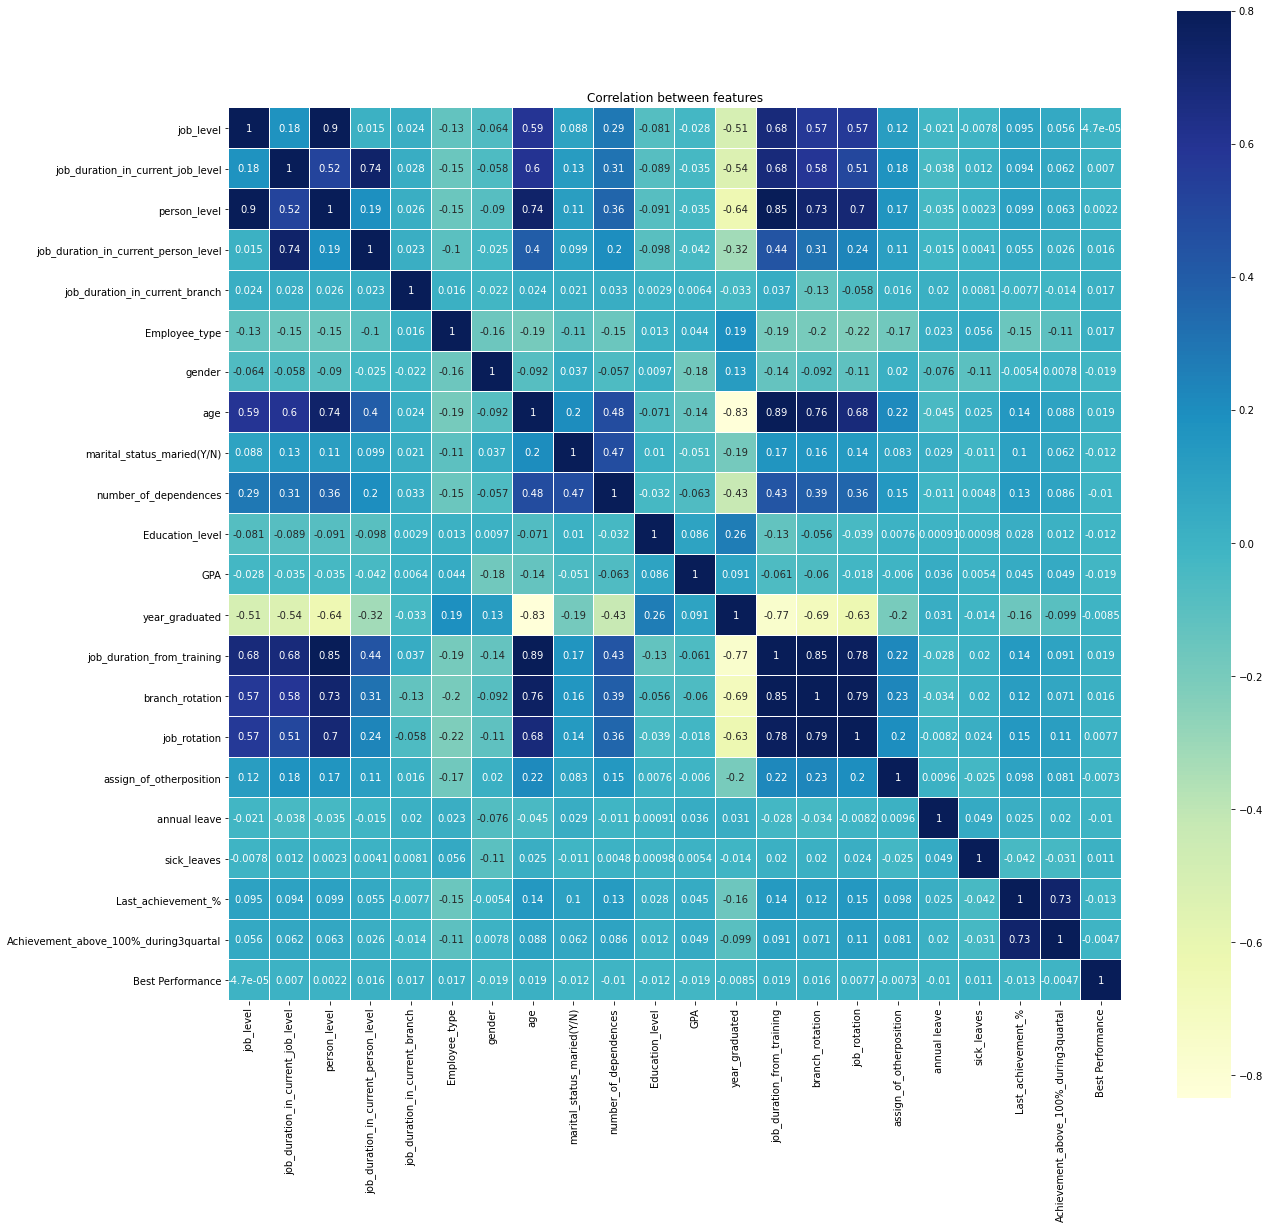

In [35]:
corr=data_train.corr()#["survived"]
plt.figure(figsize=(20, 20))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [181]:
data_train = data_train.drop(['job_level', 'job_duration_in_current_job_level', 
                              'Achievement_above_100%_during3quartal', 'assign_of_otherposition',
                              'person_level', 'year_graduated', 'job_rotation'], axis=1)

In [182]:
data_train

,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,job_duration_from_training,branch_rotation,annual leave,sick_leaves,Last_achievement_%,Best Performance
0,1.352775,1.732051,0,2,36,1,1,0,2.860000,4,2,3,0,46.37,0
1,1.292285,1.039230,0,2,32,1,0,1,3.158399,4,4,0,1,47.68,0
2,2.308679,1.780449,2,1,51,1,1,1,3.158399,28,10,2,1,40.73,0
3,1.000000,1.385641,0,2,54,1,2,1,3.158399,29,11,4,10,47.42,1
4,2.828427,0.707107,0,2,56,1,3,1,3.158399,30,9,3,0,47.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,1.256981,1.224745,0,2,35,1,1,5,3.330000,4,3,4,1,50.87,0
11149,1.385641,1.802776,1,1,33,1,2,5,3.000000,3,1,6,0,79.91,0
11150,1.256981,1.385641,1,2,30,1,0,5,3.480000,2,1,4,0,78.38,0
11151,1.118034,0.000000,0,1,34,1,1,5,3.530000,5,5,4,1,85.94,0


In [183]:
Y = data_train.loc[:,'Best Performance']
X = data_train
#X = data_train.drop(['Best Performance'], axis=1)
target_name = Y.unique()

In [184]:
X = X.to_numpy()
Y = Y.to_numpy()

In [185]:
scaler = StandardScaler()
X[:,:-1] = scaler.fit_transform(X[:,:-1])
X 

array([[ 0.01095633,  1.67361746, -0.68436922, ..., -0.40530178,
        -1.12304227,  0.        ],
       [-0.17537023,  0.01100071, -0.68436922, ..., -0.03689667,
        -1.06615827,  0.        ],
       [ 2.95540971,  1.78976342,  2.82333752, ..., -0.03689667,
        -1.36794742,  0.        ],
       ...,
       [-0.28411733,  0.84230909,  1.06948415, ..., -0.40530178,
         0.26692477,  0.        ],
       [-0.71211157, -2.48292441, -0.68436922, ..., -0.03689667,
         0.59520189,  0.        ],
       [ 2.37829167,  1.05217311,  1.06948415, ..., -0.40530178,
         0.33683564,  0.        ]])

In [212]:
epsilon = 2
minimum_samples = 10
db = DBSCAN(eps=epsilon, 
            min_samples=minimum_samples)
db.fit(X)
labels = db.labels_
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

In [213]:
x = X[labels!=-1]
x, y = x[:,:-1], x[:,-1]

<h2>Train the model</h2>

In [214]:
xg_cl = xgb.XGBClassifier(objective='reg:logistic', max_depth=4, num_boost_round=5, seed=123)
xg_cl.fit(x, y)

2021-02-25 23:10:37,206 [16860] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Yufis\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:10:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_boost_round=5,
              num_parallel_tree=1, objective='reg:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [215]:
score1 = cross_val_score(xg_cl, x, y, cv=10, scoring="roc_auc", n_jobs=-1)
print("XGB ROC-AUC Mean Score: ", np.mean(score1))

XGB ROC-AUC Mean Score:  0.5722625289292733
